Example of a script that calculates an FFT of sinesoidal signal

First generate a sine wave that we can analyze...

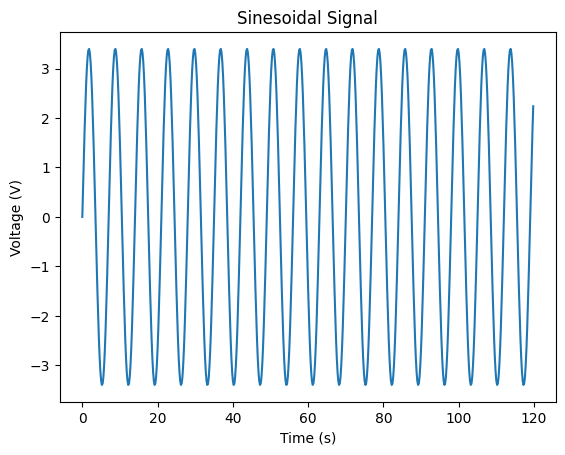

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#generate sinesoidal signal
#define t which describes how often x is sampled
#lets say the units are seconds, the timestep is 200 ms and the duration is 2 min.
tstep = 0.2
tmax = 120.0
t = np.arange(0,tmax,tstep)
#x will return to it's value every 7 units of t.
#t is in seconds, so the units of the frequency is Hz.
real_freq = 1/7.0
real_ampl = 3.4
x = real_ampl*np.sin(2*np.pi*real_freq*t)

#draw the time-domain signal
fig = plt.figure()
plt.plot(t,x)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Sinesoidal Signal')
plt.savefig('day1_freq_1.png', bbox_inches='tight')
plt.show()

Next we take an FFT of that signal, and adjust the units

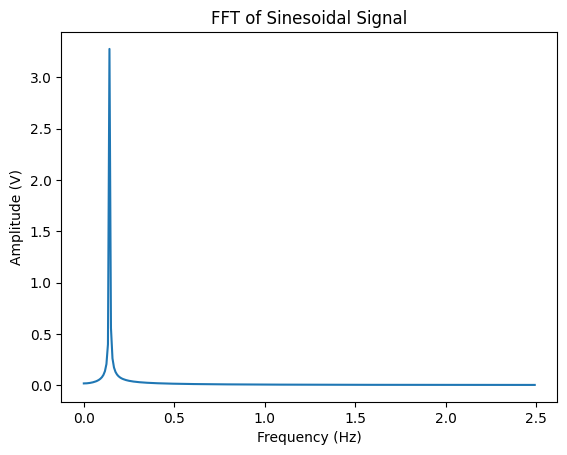

In [3]:

#take an fft of x
fx = np.fft.fft(x)
#fx has complex values which encode the phase information about x, but we only want the frequency
fx = np.abs(fx)
#now fx is a strictly positive value

#The second half of fx is a mirror image of the first half, so let's just use the first half.
tnum = len(x)
tnum2 = int(tnum/2)
fx = fx[0:tnum2]

#Normalize fx so that it has amplitude is proportional to real_ampl but independent of sampling.
fx = fx/tnum2

#Next we need to calculate the frequency that these modes corresponds to
freq = t[:tnum2]/(tmax*tstep)

#draw the frequency-domain signal
plt.plot(freq,fx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (V)')
plt.title('FFT of Sinesoidal Signal')
plt.savefig('day1_freq_2.png', bbox_inches='tight')
plt.show()
plt.close(fig)


Output the estimated frequency and amplitude

In [4]:
#Maximum value of fx
calc_ampl = np.round(np.max(fx),2)
#Value of freq at the index corresponding to maximum value of fx
calc_freq = np.round(freq[np.argmax(fx)],4)
#size of half of a frequency bin
calc_freq_err = np.round(freq[1]/2.0,4)
print("The estimated frequency is " + str(calc_freq) + " +/- " + str(calc_freq_err))
print("The amplitude at the estimated frequency is " + str(calc_ampl))


The estimated frequency is 0.1417 +/- 0.0042
The amplitude at the estimated frequency is 3.28
